# AMATH 586 Homework 3
## Shannon Dow 


### Problem 2: 

Consider

$$ v'''(t) + v'(t) v(t) - \frac{\beta_1 + \beta_2 + \beta_3}{3} v'(t) =0, $$

where $\beta_1 < \beta_2 < \beta_3$.  It follows that
$$
v(t) = \beta_2 + (\beta_3 - \beta_2) \mathrm{cn}^2\left( \sqrt{ \frac{\beta_3 - \beta_1}{12}} t, \sqrt{\frac{\beta_3 - \beta_2}{\beta_3 - \beta_1}} \right)
$$
is a solution where $\mathrm{cn}(x,k)$ is the [Jacobi cosine function](https://en.wikipedia.org/wiki/Jacobi_elliptic_functions).  Some notations use $\mathrm{cn}(x,m)$ where $m = k^2$.  The second argument of the cn function is called the elliptic modulus.  The corresponding initial conditions are

$$
v(0) = \beta_3, \\
v'(0) = 0,\\
v''(0) = -\frac{(\beta_3 - \beta_1)(\beta_3-\beta_2)}{6}.$$

We first turn it into a system
$$
u_1'(t) =  v'(t) = u_2(t),\\
u_2'(t) = v''(t) = u_3(t),\\
u_3''(t) = \frac{\beta_1 + \beta_2 + \beta_3}{3} u_2(t) -  u_2(t)u_1(t).
$$

So, set $c = \frac{(\beta_1 + \beta_2 + \beta_3)}{3}$
$$
f(u) = \begin{bmatrix} u_2 \\ u_3 \\ u_1(c - u_2)\end{bmatrix}.
$$

Because it will come back again, we have
$$
D_u f(u) = \begin{bmatrix} 0 & 1 & 0 \\
0 & 0 & 1 \\
-u_2  & c - u_1 & 0 \end{bmatrix}.
$$

In [1]:
using Plots, LinearAlgebra, Elliptic.Jacobi

In [2]:
β₁ = 0.
β₂ = 1.
β₃ = 10.
c = (β₁ + β₂ + β₃)/3
t = 0.:.01:10;
v = t -> β₂ + (β₃ - β₂)*cn(sqrt((β₃-β₁)/12)*t, (β₃-β₂)/(β₃-β₁) )^2 # Julia uses the square of the elliptic modulus

#3 (generic function with 1 method)

In [3]:
f = u -> [u[2], u[3], u[2]*(c - u[1])]
Df = u -> [0. 1. 0.; 0. 0. 1.; -u[2] c-u[1] 0.]
u₀ = [β₃,0.,-1.0/6*(β₃-β₁)*(β₃-β₂)];

In [4]:
h = 0.0001
[v(0), (v(h)-v(-h))/(2h), (v(h)-2v(0)+v(-h))/(h^2)];

In [5]:
T = 10.# Final time.
k = 0.01 # Step size

0.01

In [6]:
n = convert(Int64,ceil(T/k))# Number of time steps, converted to Int64
U = zeros(3,n+1) # To save the solution values
U[:,1] = u₀
print(U[:,1])
t = zeros(n+1) # To save times
t[1] = 0.
eigs1 = zeros(n+1)
eigs1 = complex(eigs1)
eigs2 = zeros(n+1)
eigs2 = complex(eigs2)
eigs3 = zeros(n+1)
eigs3 = complex(eigs3)

eigs, evecs = eigen(Df(u₀))
print(eigs)
eigs1[1] = eigs[1]
eigs2[1] = eigs[2]
eigs3[1] = eigs[3]
for i = 2:n+1
    U[:,i] = U[:,i-1] + k*f(U[:,i-1])
    t[i] = t[i-1] + k
    eigs, evecs = eigen(Df(U[:,i]))
    
    eigs1[i] = eigs[1]
    #print(eigs1[i])
    eigs2[i] = eigs[2]
    eigs3[i] = eigs[3]
end


[10.0, 0.0, -15.0]Complex{Float64}[0.0+0.0im, 0.0+2.51661im, 0.0-2.51661im]

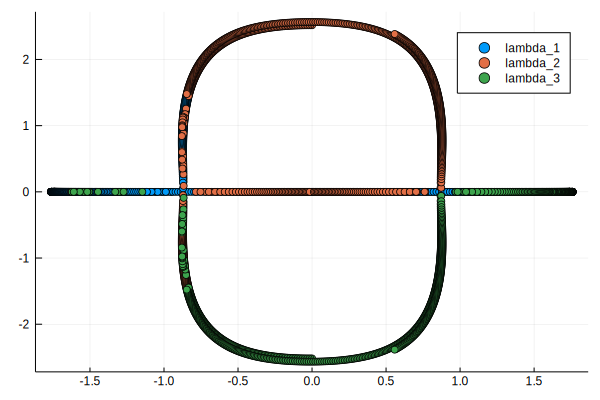

In [15]:

scatter(real(eigs1),imag(eigs1),label = "lambda_1")
scatter!(real(eigs2),imag(eigs2),label = "lambda_2")
scatter!(real(eigs3),imag(eigs3),label = "lambda_3")


### Problem 3: 
As derived in Homework 3, 
$$ R(z) = \frac{3+\frac{5}{4}z}{3(1-\frac{z}{4})(1-\frac{z}{3})} $$

In [8]:
R = (z) -> (3+ 5/4*z)/(3*(1-z/4)*(1-z/3))

#9 (generic function with 1 method)

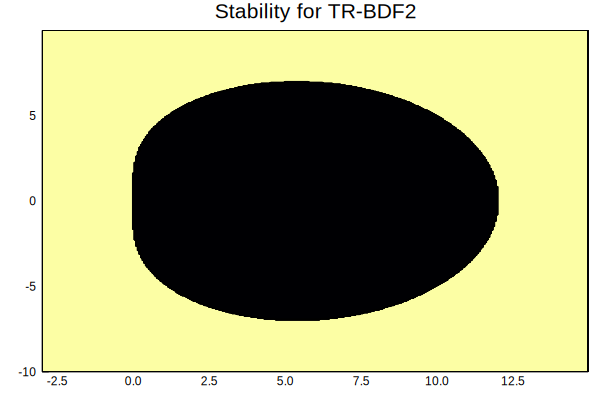

In [9]:
xrange = [-3,15]
yrange = [-10,10]
contourf(xrange[1]:0.05(1+rand()/10):xrange[2],yrange[1]:0.05(1+rand()/10):yrange[2],(x,y)-> (abs(R(x+1im*y)))<=1,colorbar=false,title = "Stability for TR-BDF2")
#z =rand(Complex{Float64}, 100)
#plot!(real(R(z)),imag(R(z)),xlim=xrange,ylim=yrange,aspectratio=1,legend=false,lw=4,linecolor=:orange)

### Problem 4(c)

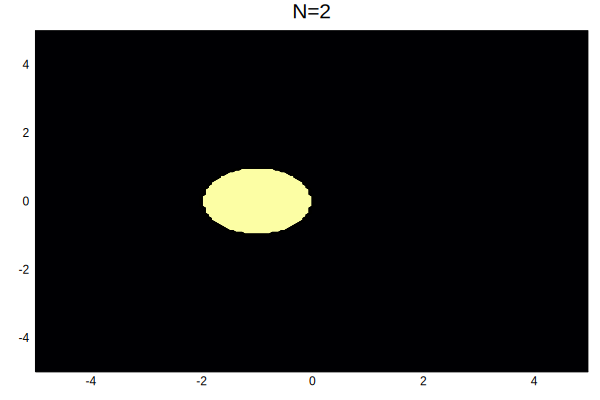

In [23]:
R = (z,N) -> sum(z.^(0:N-1))
N = 2
xrange = [-5,5]
yrange = [-5,5]
contourf(xrange[1]:0.05(1+rand()/10):xrange[2],yrange[1]:0.05(1+rand()/10):yrange[2],(x,y)-> (abs(R(x+1im*y,N)))<=1,colorbar=false, title = "N=2")


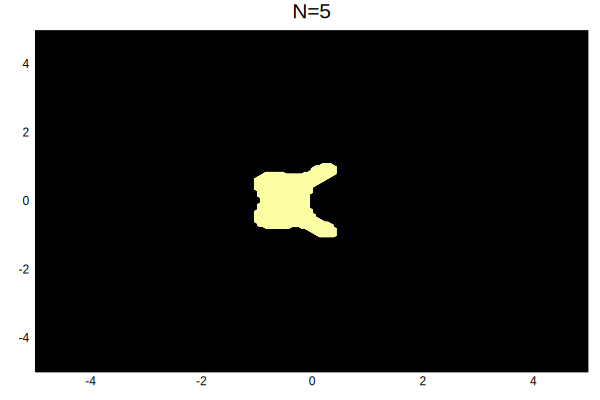

In [11]:
N = 5
contourf(xrange[1]:0.05(1+rand()/10):xrange[2],yrange[1]:0.05(1+rand()/10):yrange[2],(x,y)-> (abs(R(x+1im*y,N)))<=1,colorbar=false,title = "N=5")

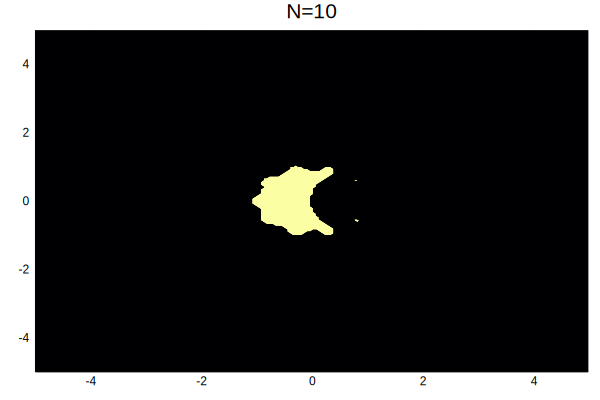

In [12]:
N = 10
contourf(xrange[1]:0.05(1+rand()/10):xrange[2],yrange[1]:0.05(1+rand()/10):yrange[2],(x,y)-> (abs(R(x+1im*y,N)))<=1,colorbar=false,title = "N=10")

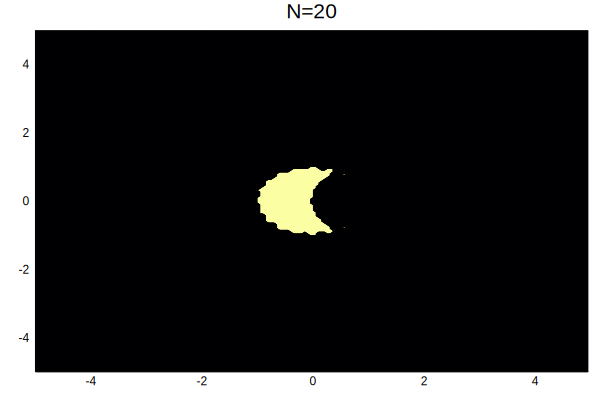

In [13]:
N = 20
contourf(xrange[1]:0.05(1+rand()/10):xrange[2],yrange[1]:0.05(1+rand()/10):yrange[2],(x,y)-> (abs(R(x+1im*y,N)))<=1,colorbar=false,title = "N=20")

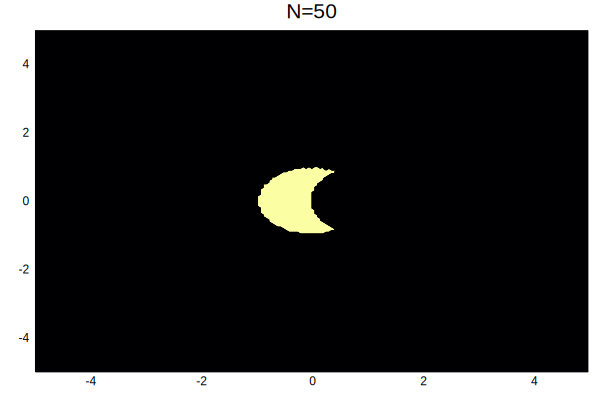

In [14]:
N = 50
contourf(xrange[1]:0.05(1+rand()/10):xrange[2],yrange[1]:0.05(1+rand()/10):yrange[2],(x,y)-> (abs(R(x+1im*y,N)))<=1,colorbar=false,title = "N=50")